In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('covid.csv')

In [4]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [5]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

<Axes: xlabel='fever', ylabel='Density'>

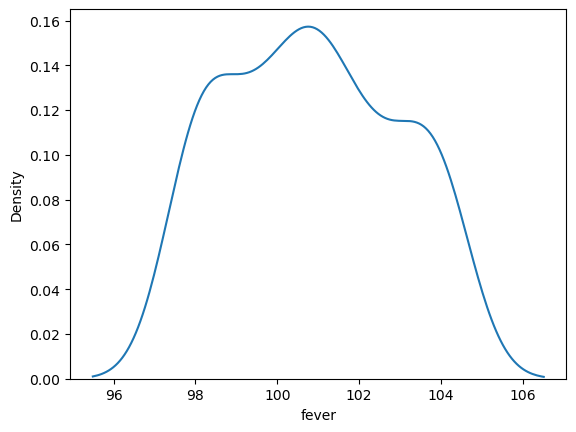

In [21]:
import seaborn as sns
sns.kdeplot(data=df,x='fever')

In [6]:
# no preprocessing on age 

# gender one hot encoding 
# city one hot encoder 
# fever simple imputer

In [8]:
x =df.iloc[:,0:-1]
y = df.has_covid

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape[0]

80

In [12]:
x_test.shape[0]

20

In [19]:
# aam zindagi 

si = SimpleImputer(strategy='mean')
si

SimpleImputer()

In [76]:
si = SimpleImputer(strategy='mean')   # or whatever strategy you're using
x_train_fever = si.fit_transform(x_train[['fever']])

# Then, transform test data using the same imputer
x_test_fever = si.transform(x_test[['fever']])

In [77]:
# ordinal encoding 

oe = OrdinalEncoder(categories=[['Mild','Strong']])
oe

OrdinalEncoder(categories=[['Mild', 'Strong']])

In [78]:
x_train_cough = oe.fit_transform(x_train[['cough']])
x_test_cough = oe.transform(x_test[['cough']])

In [79]:
ohe = OneHotEncoder(drop='first',sparse_output=False)
ohe

OneHotEncoder(drop='first', sparse_output=False)

In [84]:
x_train_gender_city = ohe.fit_transform(x_train[['gender','city']])
x_test_gender_city = ohe.transform(x_test[['gender','city']])


In [85]:
# concatenating all columns

x_train_age= x_train.iloc[:,0:1]
x_test_age= x_test.iloc[:,0:1]

In [86]:
x_train_transformed = np.concatenate((x_train_age,x_train_fever,x_train_gender_city,x_train_cough),axis=1)
x_test_transformed = np.concatenate((x_test_age,x_test_fever,x_test_gender_city,x_test_cough),axis=1)


In [87]:
# mentos zindagi 


from sklearn.compose import ColumnTransformer

In [103]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(strategy='mean'),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [104]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', SimpleImputer(), ['fever']),
                                ('tnf2',
                                 OrdinalEncoder(categories=[['Mild',
                                                             'Strong']]),
                                 ['cough']),
                                ('tnf3',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['gender', 'city'])])

In [105]:
transformer.fit_transform(x_train)

array([[101.,   0.,   0.,   0.,   0.,   1.,  81.],
       [100.,   0.,   0.,   0.,   1.,   0.,   5.],
       [100.,   0.,   0.,   0.,   1.,   0.,  19.],
       [100.,   0.,   1.,   1.,   0.,   0.,  27.],
       [103.,   0.,   0.,   1.,   0.,   0.,  73.],
       [103.,   1.,   1.,   0.,   1.,   0.,  70.],
       [102.,   0.,   0.,   1.,   0.,   0.,  49.],
       [101.,   1.,   0.,   0.,   1.,   0.,  51.],
       [101.,   0.,   0.,   1.,   0.,   0.,  64.],
       [101.,   0.,   0.,   0.,   1.,   0.,  83.],
       [ 98.,   0.,   0.,   0.,   0.,   1.,  65.],
       [104.,   0.,   0.,   0.,   0.,   0.,  18.],
       [103.,   0.,   0.,   0.,   0.,   0.,  16.],
       [104.,   0.,   1.,   0.,   1.,   0.,  16.],
       [100.,   0.,   1.,   0.,   1.,   0.,  27.],
       [101.,   0.,   0.,   0.,   0.,   0.,  84.],
       [104.,   0.,   1.,   0.,   1.,   0.,  51.],
       [102.,   0.,   0.,   0.,   0.,   0.,  69.],
       [102.,   1.,   0.,   0.,   0.,   0.,  82.],
       [103.,   0.,   0.,   0.,

In [106]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(strategy='mean'), ['fever']),
    ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']),
    ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), ['gender', 'city'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', SimpleImputer(), ['fever']),
                                ('tnf2',
                                 OrdinalEncoder(categories=[['Mild',
                                                             'Strong']]),
                                 ['cough']),
                                ('tnf3',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['gender', 'city'])])

In [107]:
transformer.fit_transform(x_train)

array([[101.,   0.,   0.,   0.,   0.,   1.,  81.],
       [100.,   0.,   0.,   0.,   1.,   0.,   5.],
       [100.,   0.,   0.,   0.,   1.,   0.,  19.],
       [100.,   0.,   1.,   1.,   0.,   0.,  27.],
       [103.,   0.,   0.,   1.,   0.,   0.,  73.],
       [103.,   1.,   1.,   0.,   1.,   0.,  70.],
       [102.,   0.,   0.,   1.,   0.,   0.,  49.],
       [101.,   1.,   0.,   0.,   1.,   0.,  51.],
       [101.,   0.,   0.,   1.,   0.,   0.,  64.],
       [101.,   0.,   0.,   0.,   1.,   0.,  83.],
       [ 98.,   0.,   0.,   0.,   0.,   1.,  65.],
       [104.,   0.,   0.,   0.,   0.,   0.,  18.],
       [103.,   0.,   0.,   0.,   0.,   0.,  16.],
       [104.,   0.,   1.,   0.,   1.,   0.,  16.],
       [100.,   0.,   1.,   0.,   1.,   0.,  27.],
       [101.,   0.,   0.,   0.,   0.,   0.,  84.],
       [104.,   0.,   1.,   0.,   1.,   0.,  51.],
       [102.,   0.,   0.,   0.,   0.,   0.,  69.],
       [102.,   1.,   0.,   0.,   0.,   0.,  82.],
       [103.,   0.,   0.,   0.,